In [1]:
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('/Users/andreawei/Documents/Learnings/Python Project/Datasets/jobs_data_final.csv')
df = df.dropna(subset='salary_standardized')

/opt/anaconda3/envs/Project1.0/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [3]:
df['year_month'] = df['date_time'].dt.strftime('%Y-%m')
df['year_month']

0        2023-08
1        2023-08
2        2023-08
3        2023-08
4        2023-08
          ...   
31025    2022-11
31026    2022-12
31027    2022-12
31028    2023-01
31029    2023-01
Name: year_month, Length: 31030, dtype: object

In [4]:
# Creating a dataframe to show monthly statistics for annual salaries offered by employers

p_25 = lambda x: np.percentile(x, 25)
p_75 = lambda x: np.percentile(x, 75)
df['month'] = df['date_time'].dt.to_period('M')
df_trend = df.pivot_table(values='salary_standardized', index='month', aggfunc={'salary_standardized': [p_25, 'median', p_75]})
df_trend = df_trend.rename(columns={'<lambda_0>': '25th Percentile', '<lambda_1>': '75th Percentile'})
df_trend = df_trend.reset_index()
df_trend


,month,25th Percentile,75th Percentile,median
0,2022-11,90000.0,122470.5,103781.0
1,2022-12,79500.0,125000.0,103781.0
2,2023-01,96500.0,106600.0,96500.0
3,2023-02,72500.0,116700.0,96500.0
4,2023-03,70000.0,116700.0,92500.0
5,2023-04,72575.0,110000.0,96500.0
6,2023-05,70000.0,119600.0,93600.0
7,2023-06,67600.0,120000.0,96500.0
8,2023-07,67600.0,125000.0,97500.0
9,2023-08,48391.2,110000.0,79500.0


In [5]:
# Separating the previous dataframe into two dataframes, one for data from 2023, the other for from 2024-25

trend_2023 = df_trend[df_trend['month'].between('2023-01', '2023-12')]
trend_2425 = df_trend[df_trend['month'].between('2024-01', '2025-05')]

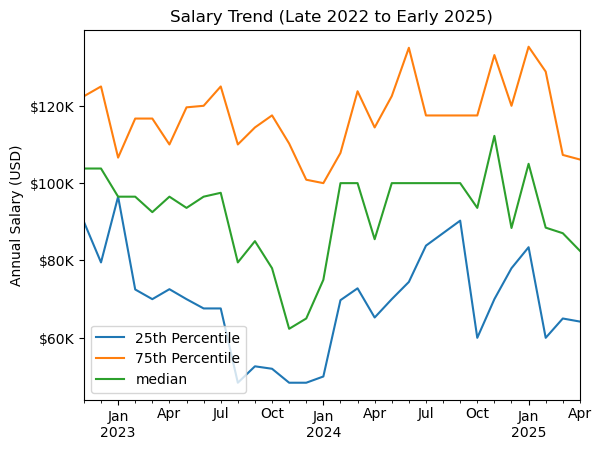

In [6]:
df_trend.plot(kind='line', x='month')

plt.xlabel(' ')
plt.ylabel('Annual Salary (USD)')
plt.title('Salary Trend (Late 2022 to Early 2025)')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

plt.tight_layout
plt.show()

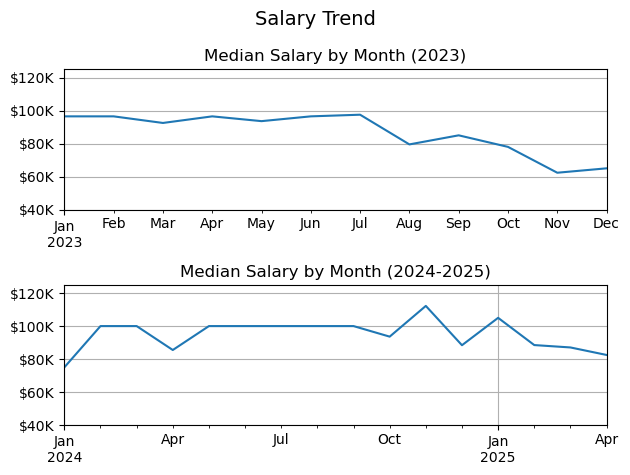

In [7]:
fig, ax = plt.subplots(2, 1)

trend_2023.plot(kind='line', x='month', y='median', linestyle='-', legend=False, ax=ax[0])
ax[0].set_title('Median Salary by Month (2023)')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(40000, 125000)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].grid(True)

trend_2425.plot(kind='line', x='month', y='median', linestyle='-', legend=False, ax=ax[1])
ax[1].set_title('Median Salary by Month (2024-2025)')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(40000, 125000)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].grid(True)

plt.suptitle('Salary Trend', fontsize=14)
plt.tight_layout()
plt.show()